In [12]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
# Set random seed for reproducibility
np.random.seed(42)

In [20]:
# 1. Generate synthetic data
def generate_data(noise_type='gaussian', n_samples=100, sigma = 5):
    X = np.random.uniform(-3, 3, size=(n_samples, 1))
    true_y = 2 * X.squeeze() + 1


    ### BEGIN HERE
    if noise_type == 'gaussian':
        noise = np.random.normal(X.mean(), X.std(),len(X))
    elif noise_type == 'laplacian':
        noise = np.random.laplace(size=len(X))
    elif noise_type == 'cauchy':
        noise = np.random.standard_cauchy(len(X))
    ### END HERE:
    else:
        raise ValueError("noise_type must be 'gaussian', 'laplacian' or 'cauchy' ")

    y = true_y + noise
    return X, y, true_y

In [15]:
import numpy as np
from scipy.optimize import minimize

class CauchyRegressor:
    def __init__(self, gamma=1.0, fit_intercept=True):
        self.gamma = gamma
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = None

    def _cauchy_loss(self, params, X, y):
        if self.fit_intercept:
            w = params[:-1]
            b = params[-1]
        else:
            w = params
            b = 0

        ### BEGIN HERE:
        y_pred =  X @ w +b
        residual = y - y_pred
        loss = np.log(1+(residual/self.gamma)**2)
        cost = np.mean(loss)
        ### END HERE.

        return cost

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        n_features = X.shape[1]

        if self.fit_intercept:
            initial_params = np.zeros(n_features + 1)  # weights + bias
        else:
            initial_params = np.zeros(n_features)

        result = minimize(self._cauchy_loss, initial_params, args=(X, y), method='BFGS')

        if self.fit_intercept:
            self.coef_ = result.x[:-1]
            self.intercept_ = result.x[-1]
        else:
            self.coef_ = result.x
            self.intercept_ = 0.0

        return self

    def predict(self, X):
        X = np.asarray(X)
        ### Begin HERE:
        output = X @ self.coef_ + self.intercept_
        ### End HERE

        return output


In [16]:
def fit_models(X, y):
    # MSE model (ordinary least squares)
    mse_model = LinearRegression()
    mse_model.fit(X, y)

    # MAE model (using SGDRegressor with 'epsilon_insensitive' loss approximation for MAE)
    mae_model = SGDRegressor(loss='epsilon_insensitive', epsilon=0.0, max_iter=1000, tol=1e-3)
    mae_model.fit(X, y)

    return mse_model, mae_model

In [17]:
def plot_results(X, y, true_y, mse_model, mae_model, cauchy_model,title):
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_mse_pred = mse_model.predict(X_plot)
    y_mae_pred = mae_model.predict(X_plot)
    y_cauchy_pred = cauchy_model.predict(X_plot)

    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='gray', alpha=0.5, label='Data')
    plt.plot(X_plot, 2*X_plot + 1, 'k--', label='True function')

    plt.plot(X_plot, y_mse_pred, label='MSE fit', linewidth=2)
    plt.plot(X_plot, y_mae_pred, label='MAE fit', linewidth=2)
    plt.plot(X_plot, y_cauchy_pred, label='Cauchy fit', linewidth=2)

    plt.title(title)
    plt.ylim(-20,20)
    plt.legend()
    plt.grid(True)
    plt.show()

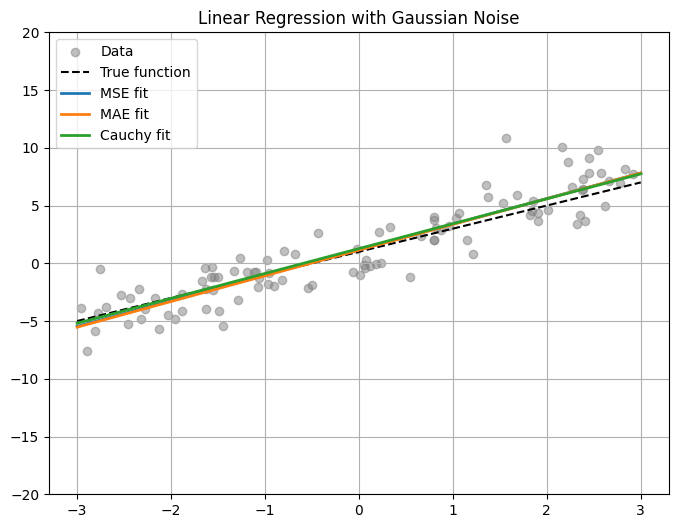

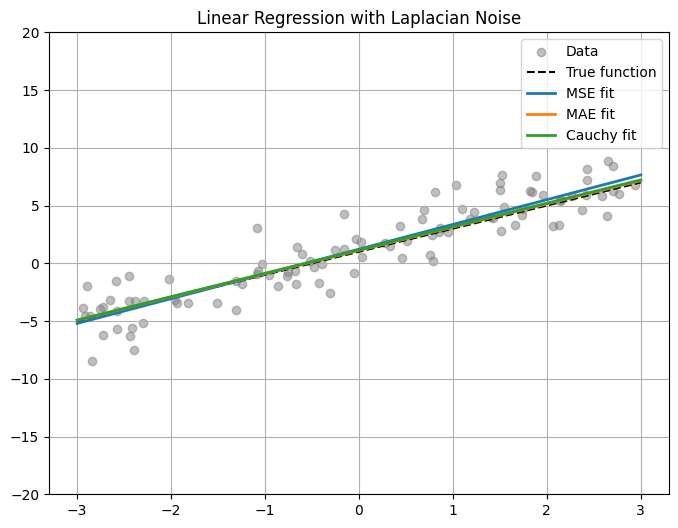

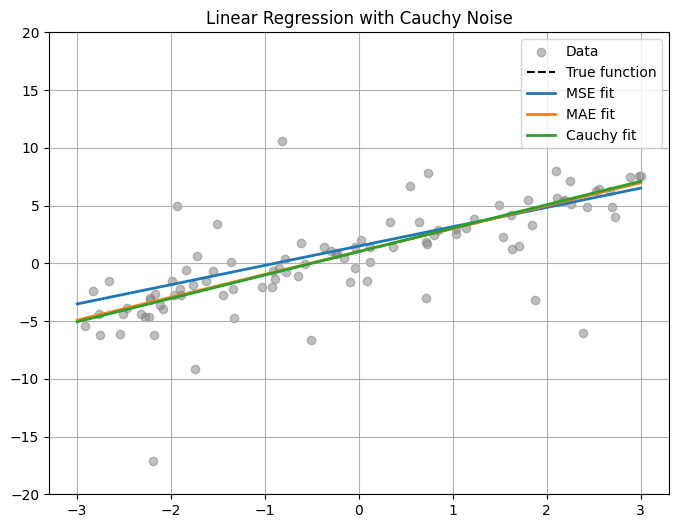

In [21]:
for noise_type in ['gaussian', 'laplacian', 'cauchy']:
    X, y, true_y = generate_data(noise_type=noise_type)
    mse_model, mae_model = fit_models(X, y)


    #Fit the cauchy model:
    cauchy_model = CauchyRegressor(gamma=1.0)
    cauchy_model.fit(X,y)

    # print(f"\nResults for {noise_type.capitalize()} Noise:")
    # print(f"MSE Model Coefficients: slope = {mse_model.coef_[0]:.2f}", intercept = {mse_model.intercept_:.2f}")
    # print(f"MAE Model Coefficients: slope = {mae_model.coef_[0]:.2f}", intercept = {mae_model.intercept_:.2f}")

    plot_results(X, y, true_y, mse_model, mae_model, cauchy_model ,title=f"Linear Regression with {noise_type.capitalize()} Noise")